In [1]:
!pip install pydicom

In [9]:
!pip install SimpleITK

Examining individual MRI images to narrow down useful features like **Series Number**, **Series Description** etc.

['AccessionNumber', 'AcquisitionDate', 'AcquisitionMatrix', 'AcquisitionNumber', 'AcquisitionTime', 'AngioFlag', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'CommentsOnThePerformedProcedureStep', 'ContentDate', 'ContentTime', 'DeidentificationMethod', 'DeidentificationMethodCodeSequence', 'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FlipAngle', 'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'ImagedNucleus', 'ImagingFrequency', 'InPlanePhaseEncodingDirection', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'LargestImagePixelValue', 'LongitudinalTemporalInformationModified', 'MRAcquisitionType', 'MagneticFieldStrength', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'NumberOfAverages', 'NumberOfPhaseEncodingSteps', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientIdentityRemoved', 'PatientName', 'PatientPosition', 'PatientSex', 'PatientSize', 'PatientWeight', 'PercentPhaseFieldOfView', '

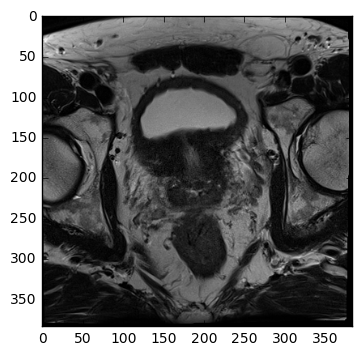

In [9]:
import sys
from IPython.display import Image
from matplotlib.pyplot import imshow
%matplotlib inline
# sys.path.append("c:\\users\\svich_000\\anaconda3\\lib\\site-packages")

import dicom
file_name = "D:\\Anaconda\\MRI\\C2\\DOI\\ProstateX-0000\\1.3.6.1.4.1.14519.5.2.1.7311.5101.158323547117540061132729905711\\1.3.6.1.4.1.14519.5.2.1.7311.5101.160028252338004527274326500702\\000000.dcm"

mu1 = dicom.read_file(file_name)
print(dir(mu1))
print(mu1.InstanceNumber)
print(mu1.PatientID)
print(mu1.SeriesNumber)
print(mu1.SeriesDescription)
mu2 = dicom.read_file(file_name)
print(mu2.InstanceNumber)
print(mu2.SeriesInstanceUID)
print(mu2.SeriesNumber)

# returns array of data elements as dicts
imshow(mu1.pixel_array, cmap='gray')
imshow(mu2.pixel_array, cmap='gray')


import csv
csv_file = "D:\\Anaconda\\MRI\\C2\\ProstateX-2-Images-Train.csv"


csv_contents = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    csv_contents = [row for row in reader][1:][1::2]
        
          


Indexing a large number of MRI files to extract this data to a python pickle.

**WARNING: This process can take several hours.**

In [ ]:
import os
import dicom
import pickle

dir_name = "D:\\Anaconda\\MRI\\DOI\\"
#print([x for x in os.walk(dir_name)])
print(os.listdir(dir_name))
l = []
s = set()
for patient in os.listdir(dir_name):
    for series in os.listdir(dir_name + patient + "\\"):
        l.append(dir_name + patient)
        s.add(dir_name + patient)
        
print(len(l), len(s))
# Not equivalent

path_map = {}
counter = 0
for patient in os.listdir(dir_name):
    for direc in os.listdir(dir_name + patient + "\\"):
        counter+=1
        print("Completed", counter/346)
        for series in os.listdir(dir_name + patient + "\\" + direc):
            for instance in os.listdir(dir_name + patient + "\\" + direc + "\\" + series):
                file =  dir_name + patient + "\\" + direc + "\\" + series + "\\" + instance
                mri = dicom.read_file(file)
                path_map[(patient, mri.InstanceNumber, mri.SeriesInstanceUID)] = file
                
new_file = "D:\\Anaconda\\MRI\\mapping_g2.pickle"
with open(new_file, 'wb') as handle:
    pickle.dump(path_map, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("DONE :D")

['ProstateX-0000', 'ProstateX-0001', 'ProstateX-0002', 'ProstateX-0003', 'ProstateX-0004', 'ProstateX-0005', 'ProstateX-0006', 'ProstateX-0007', 'ProstateX-0008', 'ProstateX-0009', 'ProstateX-0010', 'ProstateX-0011', 'ProstateX-0012', 'ProstateX-0013', 'ProstateX-0014', 'ProstateX-0015', 'ProstateX-0016', 'ProstateX-0017', 'ProstateX-0018', 'ProstateX-0019', 'ProstateX-0020', 'ProstateX-0021', 'ProstateX-0022', 'ProstateX-0023', 'ProstateX-0024', 'ProstateX-0025', 'ProstateX-0026', 'ProstateX-0027', 'ProstateX-0028', 'ProstateX-0029', 'ProstateX-0030', 'ProstateX-0031', 'ProstateX-0032', 'ProstateX-0033', 'ProstateX-0034', 'ProstateX-0035', 'ProstateX-0036', 'ProstateX-0037', 'ProstateX-0038', 'ProstateX-0039', 'ProstateX-0040', 'ProstateX-0041', 'ProstateX-0042', 'ProstateX-0043', 'ProstateX-0044', 'ProstateX-0045', 'ProstateX-0046', 'ProstateX-0047', 'ProstateX-0048', 'ProstateX-0049', 'ProstateX-0050', 'ProstateX-0051', 'ProstateX-0052', 'ProstateX-0053', 'ProstateX-0054', 'Prostate

Checking for invariants and programatically checkable facts. 

In [12]:
import pickle

new_file = "D:\\Anaconda\\MRI\\mapping_g2.pickle"
dic = {}
with open(new_file, 'rb') as handle:
    dic = pickle.load(handle)

print([k for k in dic.keys()][0])
# print(len(dic))

#invariant check: no indexes say 0
for key in dic.keys():
    if(key[2] == 0):
        print("Invariant broken")
        break
print("Invariant holds if prev didn't break")

#Either your series number is wrong, look for other data

#DCM file says series number is x,
res = []
for key,value in dic.items():
    if(key[0] == 'ProstateX-0001'):
        res.append((key, value))


#print(res)

('ProstateX-0112', '13', '1.3.6.1.4.1.14519.5.2.1.7311.5101.107590848481842424445444186827')
Invariant holds if prev didn't break


Checking for manually checkable facts.

['ProstateX-0000', 'ep2d_diff_tra_DYNDISTCALC_BVAL0', '20120103', '1', '25.7457 31.8707 -38.511', '2,4.0067e-010,0.00377059,-46.6873,-0.000797221,1.89675,0.95144,-114.14,-0.00238396,-0.634294,2.84513,-18.0506,0,0,0,1', '36 72 9', '3', '2,2,3', '84x128x19x1', 'ep2d_diff_tra_DYNDISTCALC_BVAL', '8', '1.3.6.1.4.1.14519.5.2.1.7311.5101.338465037878158762935951983202']
[25.7457, 31.8707, -38.511]
9
ProstateX-0000 9 1.3.6.1.4.1.14519.5.2.1.7311.5101.338465037878158762935951983202
D:\Anaconda\MRI\DOI\ProstateX-0000\1.3.6.1.4.1.14519.5.2.1.7311.5101.158323547117540061132729905711\1.3.6.1.4.1.14519.5.2.1.7311.5101.338465037878158762935951983202\000000.dcm
(36, 72, -2)
(42, 42)


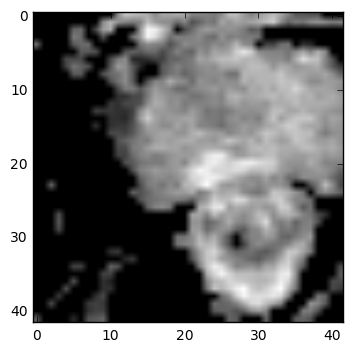

In [19]:
import SimpleITK as sitk
import numpy as np

index = 3
print(csv_contents[index])
f_name = "D:\Anaconda\\MRI\\DOI\\ProstateX-0000\\1.3.6.1.4.1.14519.5.2.1.7311.5101.158323547117540061132729905711\\1.3.6.1.4.1.14519.5.2.1.7311.5101.160028252338004527274326500702\\000014.dcm"
posKTRANS = [float(i) for i in csv_contents[index][4].split(' ')] #from CSV file

print(posKTRANS)
print(int(csv_contents[index][-7].split(' ')[-1]))
print(csv_contents[index][0], int(csv_contents[index][-7].split(' ')[-1]), csv_contents[index][-1])
print(dic[(csv_contents[index][0], int(csv_contents[index][-7].split(' ')[-1]), csv_contents[index][-1])])
imgInfo = sitk.ReadImage(dic[(csv_contents[index][0], int(csv_contents[index][-7].split(' ')[-1]), csv_contents[index][-1])])
# imgInfo = sitk.ReadImage(f_name)
ijk = imgInfo.TransformPhysicalPointToIndex(posKTRANS) #X,Y,Z

imgArr = sitk.GetArrayFromImage(imgInfo) #Z,Y,X indexing
print(ijk)
imgArr = imgArr.astype('float')
imshow(imgArr[0], cmap='gray')

def extractImage(imgarray, coord_i, coord_j, size):
    #print(coord_i, coord_j)
    # return np.array((imgarray.tolist())[coord_i-size/2:coord_i+size/2,coord_j-size/2:coord_j+size/2])
    arr = []
    for i in range(0,len(imgarray)):
        if (i > coord_i - size/2 and i <= coord_i + size/2):
            arr.append([])
            for j in range(0,len(imgarray[0])):
                if (j >= coord_j - size/2 and j < coord_j + size/2):
                    arr[-1].append(imgarray[i][j])
                
    return np.array(arr)
print(extractImage(imgArr[0], ijk[1], ijk[0], 42).shape)
imshow(extractImage(imgArr[0], ijk[1], ijk[0], 42), cmap = 'gray')
                

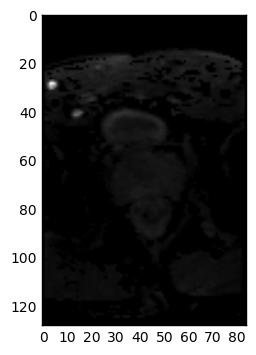

In [20]:
imshow(imgArr[0], cmap = 'gray')

In [19]:
!pip install h5py

In [11]:
!pip install scikit-learn==0.18.rc2

  Found existing installation: scikit-learn 0.17.1
    Uninstalling scikit-learn-0.17.1:
      Successfully uninstalled scikit-learn-0.17.1


    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.


This depicts an initial comparison between **SVM** and **Neural Network** approaches for the patches dataset.

**Neural Net accuracy: 77%
SVM accuracy: 23%**

KeysView(<HDF5 group "/" (2 members)>)
330
330
[ 1.  0.  1.]
25
SVM accuracy is 0.7769230769230769
130
NN accuracy is  0.23076923076923078


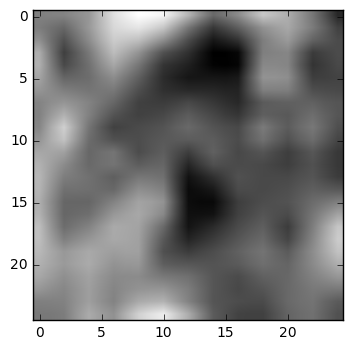

In [38]:
#Support Vector machine implementation

import h5py
import numpy as np

file = h5py.File('D:\\Anaconda\\MRI\\prostatex_patches.h5', 'r')
#print(dir(file))
print(file['/'].keys())

labels = file['/']['labels']
patches = file['/']['patches']

print(len(patches))
print(len(labels))
print(labels[:3])
print(len(patches[0][0]))

len_set = set()
for patch in patches:
    len_set.add(len(patch))

data = []

for patch in patches:
    img = []
    for row in patch:
        for element in row:
            for sub in element:
                img.append(sub)
    data.append(img)
    
imshow(patches[0][0], cmap = 'gray')


ts = 200
#print(data[0])
from sklearn import svm
Y = labels[:ts]
X = data[:ts]
clf = svm.SVC()
clf.fit(X, Y)

test_pred = clf.predict(data[ts:])
true_pred = labels[ts:]

ctr = 0
for i in range(0,len(test_pred)):
    if(test_pred[i] == true_pred[i]):
        ctr+=1
        
print("SVM accuracy is", ctr/len(labels[ts:]))


from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, Y)

test_pred = clf.predict(data[ts:])
true_pred = labels[ts:]
print(len(labels[ts:]))
ctr = 0
for i in range(0,len(test_pred)):
    if(test_pred[i] == true_pred[i]):
        ctr+=1
        
print("NN accuracy is ", ctr/len(labels[ts:]))


Keras Neural Network investigation. Found that more data is required.

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

print(len(X[0]))
model = Sequential()
model.add(Dense(12, input_dim=1875, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=1, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, Y, nb_epoch=150, batch_size=10)

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1875
Epoch 1/150
200/200 [==============================] - 0s - loss: 11.8892 - acc: 0.2550     
Epoch 2/150
200/200 [==============================] - 0s - loss: 11.8820 - acc: 0.2550     
Epoch 3/150
200/200 [==============================] - 0s - loss: 11.8797 - acc: 0.2550     
Epoch 4/150
200/200 [==============================] - 0s - loss: 11.8792 - acc: 0.2550     
Epoch 5/150
200/200 [==============================] - 0s - loss: 11.8789 - acc: 0.2550     
Epoch 6/150
200/200 [==============================] - 0s - loss: 11.8788 - acc: 0.2550     
Epoch 7/150
200/200 [==============================] - 0s - loss: 11.8786 - acc: 0.2550     
Epoch 8/150
200/200 [==============================] - 0s - loss: 11.8786 - acc: 0.2550     
Epoch 9/150
200/200 [==============================] - 0s - loss: 11.8785 - acc: 0.2550     
Epoch 10/150
200/200 [==============================] - 0s - loss: 11.8784 - acc: 0.2550     
Epoch 11/150
200/200 [==============================] - 0s - los